## Importing Libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np


## Loading data and splitting

In [3]:
(X_train,Y_train),(x_test,y_test)=mnist.load_data()


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
Y_train.shape

(60000,)

In [6]:
import matplotlib.pyplot as plt


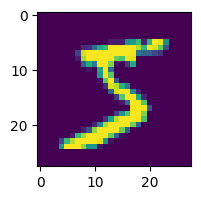

In [7]:
plt.subplots(figsize=(2,2))
plt.imshow(X_train[0])


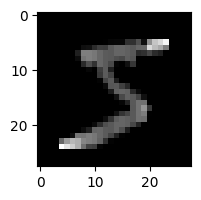

In [8]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.subplots(figsize=(2,2))
plt.imshow(X_train[0],cmap='gray')

## Changing Shape of Input to apply kernel operation

In [9]:
X_trainr=np.array(X_train).reshape(-1,28,28,1)
x_testr=np.array(x_test).reshape(-1,28,28,1)

In [10]:
X_trainr.shape

(60000, 28, 28, 1)

## Building Neural Network

In [11]:

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [12]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))


/Users/devanshtripathi/Desktop/CodeAlpha_Tasks/CodeAlpha_Digit_Recognition/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,442 (556.41 KB)

 Trainable params: 142,442 (556.41 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(X_trainr,Y_train,epochs=6,validation_split=0.3)

Epoch 1/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9309 - loss: 0.2243 - val_accuracy: 0.9723 - val_loss: 0.0894
Epoch 2/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9788 - loss: 0.0697 - val_accuracy: 0.9753 - val_loss: 0.0796
Epoch 3/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9853 - loss: 0.0474 - val_accuracy: 0.9831 - val_loss: 0.0564
Epoch 4/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9886 - loss: 0.0365 - val_accuracy: 0.9824 - val_loss: 0.0585
Epoch 5/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9913 - loss: 0.0266 - val_accuracy: 0.9836 - val_loss: 0.0533
Epoch 6/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9932 - loss: 0.0203 - val_accuracy: 0.9856 - val_loss: 0.0499


## Checking Accuracy 

In [16]:
test_loss,test_accu=model.evaluate(x_testr,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0466


In [17]:
test_accu

0.9871000051498413

In [18]:
test_loss

0.04657170549035072

In [19]:
y_pre=model.predict(x_testr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
y_pre

array([[7.6944167e-09, 2.1210750e-08, 7.3964026e-07, ..., 9.9999881e-01,
        2.3737114e-08, 1.4698026e-07],
       [1.0720696e-08, 8.8448203e-08, 9.9999976e-01, ..., 3.7462167e-09,
        9.0533774e-08, 8.3744418e-12],
       [4.0111894e-10, 9.9999952e-01, 2.3003546e-10, ..., 6.8627490e-09,
        1.2658383e-11, 3.4027821e-08],
       ...,
       [3.5782026e-14, 2.6747560e-07, 1.6146755e-10, ..., 1.4405315e-09,
        1.0801726e-09, 3.4714990e-08],
       [4.0896439e-10, 7.8784972e-11, 7.8726767e-09, ..., 6.8169081e-10,
        1.0828071e-03, 2.3474168e-08],
       [3.0096124e-05, 8.8035826e-08, 6.8737704e-06, ..., 4.4249877e-12,
        2.3407944e-07, 4.1189850e-08]], shape=(10000, 10), dtype=float32)

In [21]:
y_predict=[]
for i in range(0,10000):

    y_predict.append(y_pre[i].argmax())


In [22]:
print(y_predict[2])

1


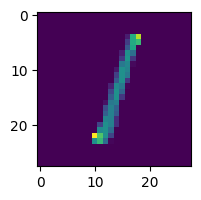

In [23]:
plt.subplots(figsize=(2,2))
plt.imshow(x_testr[2])

In [24]:
import cv2 

In [25]:
img=cv2.imread('four.png')
img.shape

(764, 840, 3)

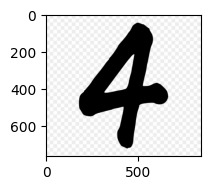

In [26]:
plt.subplots(figsize=(2,2))
plt.imshow(img)

In [27]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [28]:
gray.shape

(764, 840)

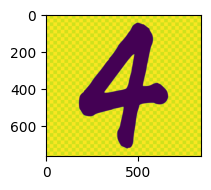

In [29]:
plt.subplots(figsize=(2,2))
plt.imshow(gray)

In [30]:
resized_img=cv2.resize(gray,(28,28))

In [31]:
resized_img=tf.keras.utils.normalize(resized_img,axis=1)

In [32]:
resized_img=np.array(resized_img).reshape(-1,28,28,1)

In [33]:
resized_img.shape

(1, 28, 28, 1)

In [34]:
ans=model.predict(resized_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [35]:
ans.argmax()

np.int64(4)

In [37]:
import pickle as pk
with open("model.pkl", "wb") as f:
    pk.dump(model, f)